In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, precision_recall_curve, roc_curve, auc
)

In [56]:
def evaluate_model(model, X_test, y_test, y_pred, y_proba, model_name):
    print(f"\n==== {model_name} ====")
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")

    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

    # PR-кривая
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(5, 4))
    plt.plot(recall, precision, label=f'{model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'PR-кривая ({model_name})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ROC-кривая
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-кривая ({model_name})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {'model': model_name, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'roc_auc': roc_auc}

In [57]:
data = pd.read_csv('source/repos/ml_univer/3/Titanic.csv')
data_cleaned = data.dropna()
non_numeric_columns = data_cleaned.select_dtypes(include=['object']).columns
columns_to_drop = [col for col in non_numeric_columns if col not in ['Sex', 'Embarked']]
data_cleaned = data_cleaned.drop(columns=columns_to_drop)
data_cleaned['Sex'] = data_cleaned['Sex'].map({'male': 0, 'female': 1})
data_cleaned['Embarked'] = data_cleaned['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
data_cleaned = data_cleaned.drop(columns=['PassengerId'])
X = data_cleaned.drop(columns=['Survived'])
y = data_cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


==== Logistic Regression ====
Accuracy:  0.7297
Precision: 0.7407
Recall:    0.8696
F1-score:  0.8000


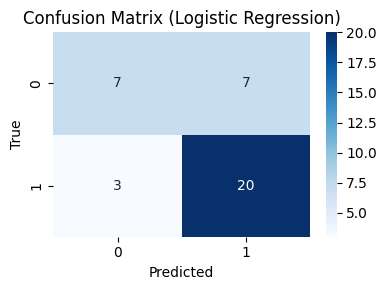

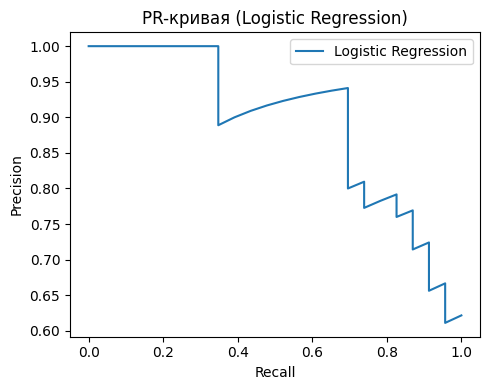

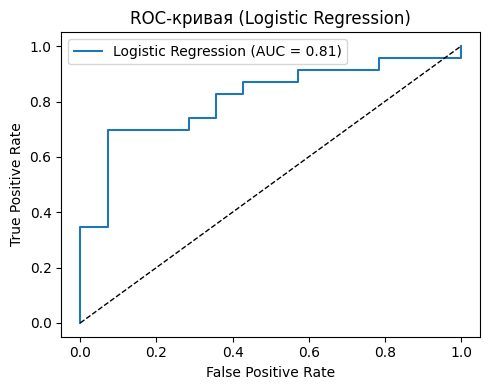

In [58]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]
res_logreg = evaluate_model(logreg, X_test, y_test, y_pred_logreg, y_proba_logreg, 'Logistic Regression')


==== SVM ====
Accuracy:  0.6216
Precision: 0.6216
Recall:    1.0000
F1-score:  0.7667


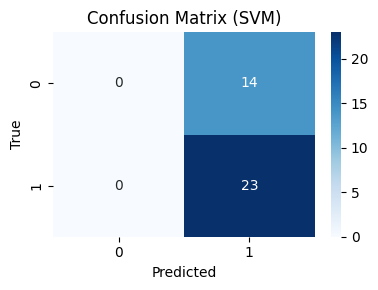

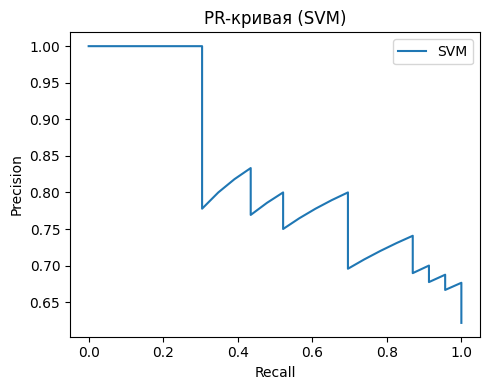

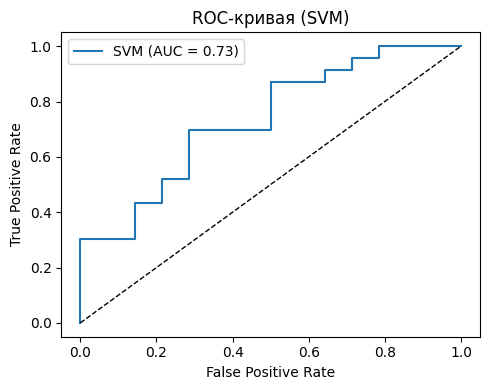

In [59]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]
res_svm = evaluate_model(svm, X_test, y_test, y_pred_svm, y_proba_svm, 'SVM')


==== KNN ====
Accuracy:  0.6757
Precision: 0.6774
Recall:    0.9130
F1-score:  0.7778


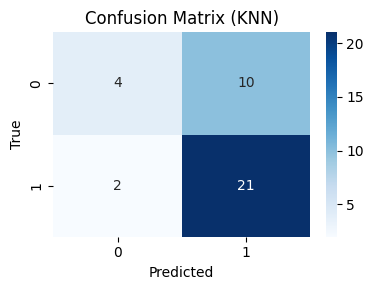

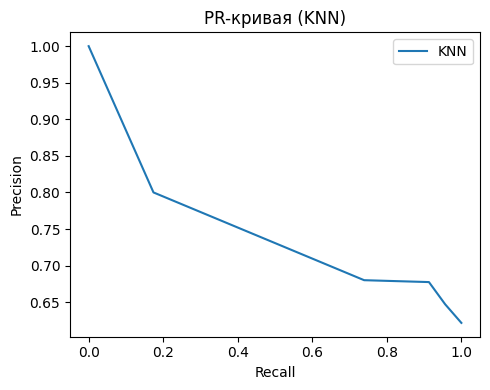

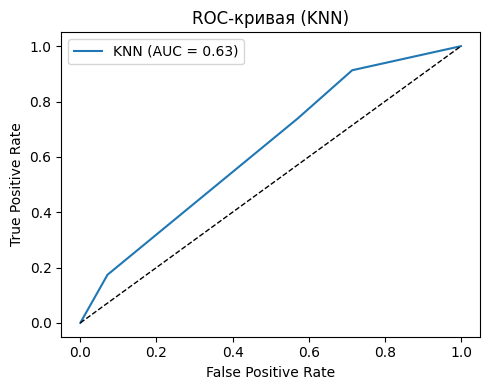

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]
res_knn = evaluate_model(knn, X_test, y_test, y_pred_knn, y_proba_knn, 'KNN')

In [64]:
results = pd.DataFrame([res_logreg, res_svm, res_knn])
print(results[['model', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']])

best_model = results.sort_values('f1', ascending=False).iloc[0]
print(f"\nЛучшая модель по F1: {best_model['model']} (F1 = {best_model['f1']:.4f})")

                 model  accuracy  precision    recall        f1   roc_auc
0  Logistic Regression  0.729730   0.740741  0.869565  0.800000  0.810559
1                  SVM  0.621622   0.621622  1.000000  0.766667  0.732919
2                  KNN  0.675676   0.677419  0.913043  0.777778  0.625776

Лучшая модель по F1: Logistic Regression (F1 = 0.8000)
